In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob 

In [2]:
def plot_regrets(arrs, labels, data, X): 
    """
    in: 
        arrs: list of regrets [n,T] 
        labels: list of str 
    """
    n = len(arrs)
    cmap = plt.cm.get_cmap('jet')
    colors = cmap(np.arange(cmap.N))
    cinv = cmap.N / (1. * n) 
    markers=['.','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']

     #arrs[0].shape[-1]
    figsize=(5, 4)
    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=1)
    # t = np.arange(T)
    # xs = np.arange(T)
    for i, arr, l in zip(range(n), arrs, labels):
        # arr = arr[:,:T] # truncate as different algo can have different iteration length 
        mean = np.mean(arr, axis=0)
        std = np.std(arr, axis=0) / np.sqrt(arr.shape[0])
        ax.plot(X, mean, label=l, marker=markers[i % len(markers)], markevery=4, color=colors[int((i+0.5)*cinv)]) 
        ax.fill_between(X, mean + 1.96*std, mean-1.96*std, alpha=0.1, color=colors[int((i+0.5)*cinv)])

    ax.set_title('{}'.format(data),fontsize=12)
    ax.set_xlim([0,X[-1]])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,500])
    ax.set_xlabel('K',fontsize=12)
    ax.set_ylabel(r'$\log$' + '(SubOpt)',fontsize=12)
    ax.grid('on')
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


    return fig 

# Quadratic

algo: LinLCB, n: 5
(5, 50)
algo: NeuralGreedy, n: 5
(5, 50)
algo: NeuraLCB, n: 5
(5, 50)
algo: NeuralTS, n: 5
(5, 50)
algo: NeuraLMC, n: 5
(5, 50)


/tmp/ipykernel_2224791/972051142.py:25: RuntimeWarning: invalid value encountered in log
  arr.append( np.log(tmp['arr_0'][:,1]) )


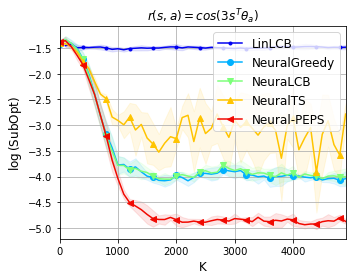

In [5]:
data = 'cosine'
func_label = r'$r(s,a) = cos(3s^T \theta_a)$'
result_path = '/results/cosine/unif'
algos = [ 'LinLCB','NeuralGreedy', 'NeuraLCB', 'NeuralTS', 'NeuraLMC']
algo_labels = [ 'LinLCB','NeuralGreedy', 'NeuraLCB', 'NeuralTS', 'Neural-PEPS']
# T = 500
arrs = []
upd_times = [] 
act_select_times = []
X = None
for algo in algos: 
    arr = []
    upd_time = [] 
    act_select_time = []
    data_path = os.path.join(result_path, algo) 
    n = len(glob.glob1(data_path,"*.npz"))
 
    # n = 1
    print('algo: {}, n: {}'.format(algo, n))
    for i in range(n): 
        tmp = np.load(os.path.join(result_path, algo, 'trial={}.npz'.format(i)))
        arr.append( np.log(tmp['arr_0'][:,1]) ) 

        if X is None: 
            X = tmp['arr_0'][:,0]

        # Only use the first trial to count elapsed time as running multiple trials does not give a reliable measure of time
        # After running for each algo to get reget, run each algo one more time with trial=0 only to get a measure of time
        # if i == 0: 
        try:
            upd_time.append(tmp['arr_1'][:,1])
            act_select_time.append(tmp['arr_2'][:,1]) 
        except: 
            pass 
    
    arr = np.array(arr) # (n,T)
    print(arr.shape)
    upd_time = np.array(upd_time) 
    act_select_time = np.array(act_select_time)
    # print(act_select_time.shape)
    arrs.append(arr)
    upd_times.append(upd_time)
    act_select_times.append(act_select_time) # (n_algo, T)
fig = plot_regrets(arrs, algo_labels, func_label, X)

fig.savefig(os.path.join(result_path, '{}_regret_neurips.png'.format(data)), bbox_inches='tight', dpi=400)

# act_select_times = np.array(act_select_times)
